# Project 1

## Step 1: Load the data and perform basic operations.

##### 1. Load the data in using pandas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

act_data = pd.read_csv("./data/act.csv", na_values=['NA'])
sat_data = pd.read_csv("./data/sat.csv", na_values=['NA'])

##### 2. Print the first ten rows of each dataframe.

In [2]:
act_data.drop(columns="Unnamed: 0", inplace=True)

In [3]:
sat_data.drop(columns="Unnamed: 0", inplace=True)

##### 3. Describe in words what each variable (column) is.

Unnamed: Id associated to the row

State: Location of the data in the row

Participation: Percent of students that took the test

Subjects: Average/Mean of students' scores for that subject

Composite: Mean of ACT subjects

Total: Sum of all subjects

##### 4. Does the data look complete? Are there any obvious issues with the observations?

The first column of both files of data are missing a name. It's currently entitled "Unnamed: 0".

We'll need to adjust Unnamed: 0 and Math since they're both shared features in ACT and SAT.

The Math score for Maryland can't be 52 (based on the total, and the actual source of the data). It should actually be 524.

In [4]:
sat_data.loc[sat_data["Math"] == 52] = 524

##### 5. Print the types of each column.

In [5]:
print(act_data.dtypes)
print(sat_data.dtypes)

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object
State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object


##### 6. Do any types need to be reassigned? If so, go ahead and do it.

There are two things based on preference:
1. We can convert the Participation column into a float
2. We can match the Total column within the SAT data to the Total column within the ACT data by converting it to a float.
   
   The same can be done to all of the subject values within the SAT data

In [6]:
act_data["Participation"] = act_data["Participation"].str.rstrip("%").astype('float')
sat_data["Participation"] = sat_data["Participation"].str.rstrip("%").astype('float')

The first two issues have been addressed and fixed.

##### 7. Create a dictionary for each column mapping the State to its respective value for that column. (For example, you should have three SAT dictionaries.)

In [7]:
def each_val_per_state(data):
    state_dict = {}
    
    data_columns = list(data)
    state_loc = data_columns.index("State")+1
    
    for x in data_columns[state_loc:]:
        state_dict[x] = data.set_index("State").to_dict()[x]

    return state_dict

sat_dict = each_val_per_state(sat_data)
act_dict = each_val_per_state(act_data)

##### 8. Create one dictionary where each key is the column name, and each value is an iterable (a list or a Pandas Series) of all the values in that column.

In [8]:
sat_data_list = sat_data.to_dict('list')
sat_data_series = sat_data.to_dict('series')
act_data_list = act_data.to_dict('list')
act_data_series = act_data.to_dict('series')

##### 9. Merge the dataframes on the state column.

In [9]:
merged_dataframe = pd.merge(act_data,sat_data, on=["State"])

##### 10. Change the names of the columns so you can distinguish between the SAT columns and the ACT columns.

In [10]:
merged_dataframe = pd.merge(act_data,sat_data, on=["State"], suffixes=('_act','_sat'))

##### 11. Print the minimum and maximum of each numeric column in the data frame.

In [11]:
#only run once
rearranged_columns = ['State', 'Participation_act', 'English', 'Math_act', 'Reading', 'Science', 'Composite', 'Participation_sat', 'Evidence-Based Reading and Writing', 'Math_sat', 'Total']
merged_dataframe = merged_dataframe[rearranged_columns]

In [12]:
a = merged_dataframe.min()[3:]
b = merged_dataframe.max()[3:]
print("Min:","\n", a,"\n\n", "Max:","\n", b)

Min: 
 Math_act                                18
Reading                               18.1
Science                               18.2
Composite                             17.8
Participation_sat                        2
Evidence-Based Reading and Writing     482
Math_sat                               468
Total                                  950
dtype: object 

 Max: 
 Math_act                              25.3
Reading                                 26
Science                               24.9
Composite                             25.5
Participation_sat                      100
Evidence-Based Reading and Writing     644
Math_sat                               651
Total                                 1295
dtype: object


##### 12. Write a function using only list comprehensions, no loops, to compute standard deviation. Using this function, calculate the standard deviation of each numeric column in both data sets. Add these to a list called `sd`.

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

In [13]:
filler_columns_mean = ["Mean"] #not asked for, but useful to see
filler_columns_sd = ["Std"]

mean = [merged_dataframe[x].mean() for x in rearranged_columns[1:]]
sd = [merged_dataframe[x].std() for x in rearranged_columns[1:]]

mean = pd.Series(filler_columns_mean+mean, name="Mean", index=rearranged_columns)
sd = pd.Series(filler_columns_sd+sd, name="Sd", index=rearranged_columns)

## Step 2: Manipulate the dataframe

##### 13. Turn the list `sd` into a new observation in your dataset.

In [14]:
merged_dataframe.loc["Mean"] = mean
merged_dataframe.loc["Std"] = sd

##### 14. Sort the dataframe by the values in a numeric column (e.g. observations descending by SAT participation rate)

In [15]:
merged_dataframe.sort_values("Participation_act").head()

,State,Participation_act,English,Math_act,Reading,Science,Composite,Participation_sat,Evidence-Based Reading and Writing,Math_sat,Total
19,Maine,8.0,24.2,24.0,24.8,23.7,24.3,95.0,513.0,499.0,1012.0
28,New Hampshire,18.0,25.4,25.1,26.0,24.9,25.5,96.0,532.0,520.0,1052.0
7,Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503.0,492.0,996.0
38,Rhode Island,21.0,24.0,23.3,24.7,23.4,24.0,71.0,539.0,524.0,1062.0
37,Pennsylvania,23.0,23.4,23.4,24.2,23.3,23.7,65.0,540.0,531.0,1071.0


##### 15. Use a boolean filter to display only observations with a score above a certain threshold (e.g. only states with a participation rate above 50%)

In [16]:
merged_dataframe.query("Participation_sat > 50").tail()

,State,Participation_act,English,Math_act,Reading,Science,Composite,Participation_sat,Evidence-Based Reading and Writing,Math_sat,Total
38,Rhode Island,21.0,24.0,23.3,24.7,23.4,24.0,71.0,539.0,524.0,1062.0
42,Texas,45.0,19.5,20.7,21.1,20.9,20.7,62.0,513.0,507.0,1020.0
44,Vermont,29.0,23.3,23.1,24.4,23.2,23.6,60.0,562.0,551.0,1114.0
45,Virginia,29.0,23.5,23.3,24.6,23.5,23.8,65.0,561.0,541.0,1102.0
46,Washington,29.0,20.9,21.9,22.1,22.0,21.9,64.0,541.0,534.0,1075.0


## Step 3: Visualize the data

##### 16. Using MatPlotLib and PyPlot, plot the distribution of the Rate columns for both SAT and ACT using histograms. (You should have two histograms. You might find [this link](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes) helpful in organizing one plot above the other.) 

In [17]:
def sns_dist_plot(data, title, color):
    f, ax = plt.subplots(1, 1, figsize=(10,5), sharey=True)
    ax.set_title(title, fontsize=20)
    sns.distplot(data[:50],
                 kde_kws={"color": "k", "lw": 3, "label": "KDE"},
                 hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": color}, ax=ax)
    #plt.title(title)
    plt.figure()

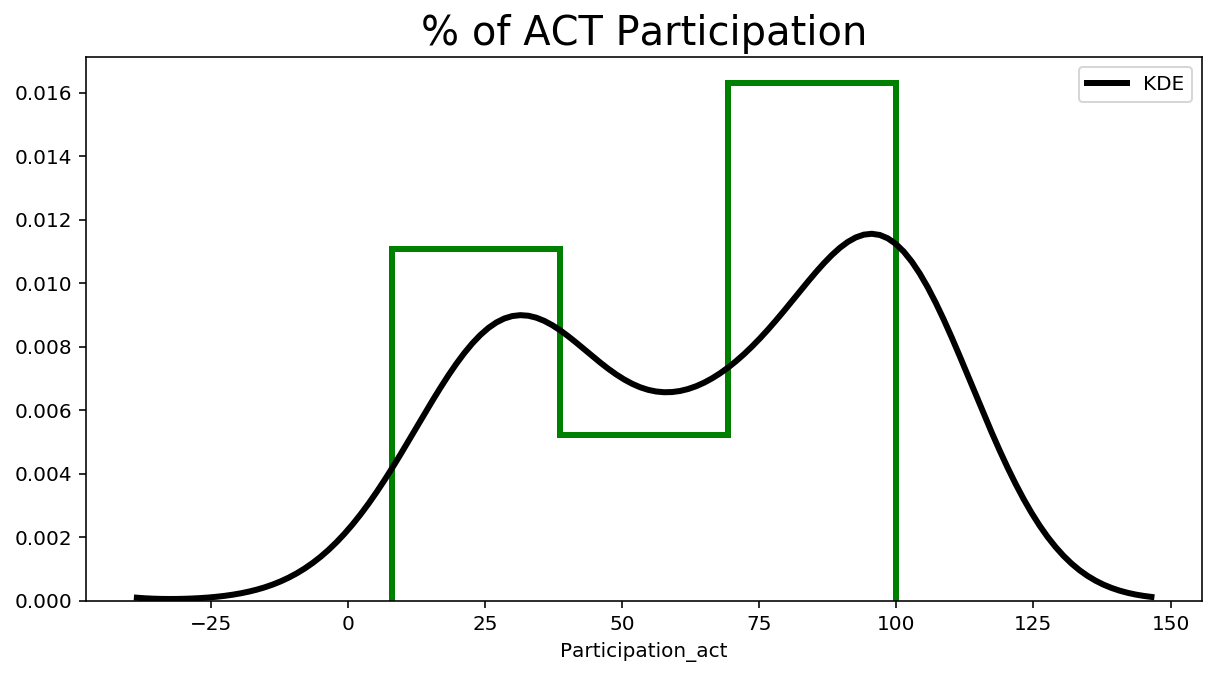

<Figure size 432x288 with 0 Axes>

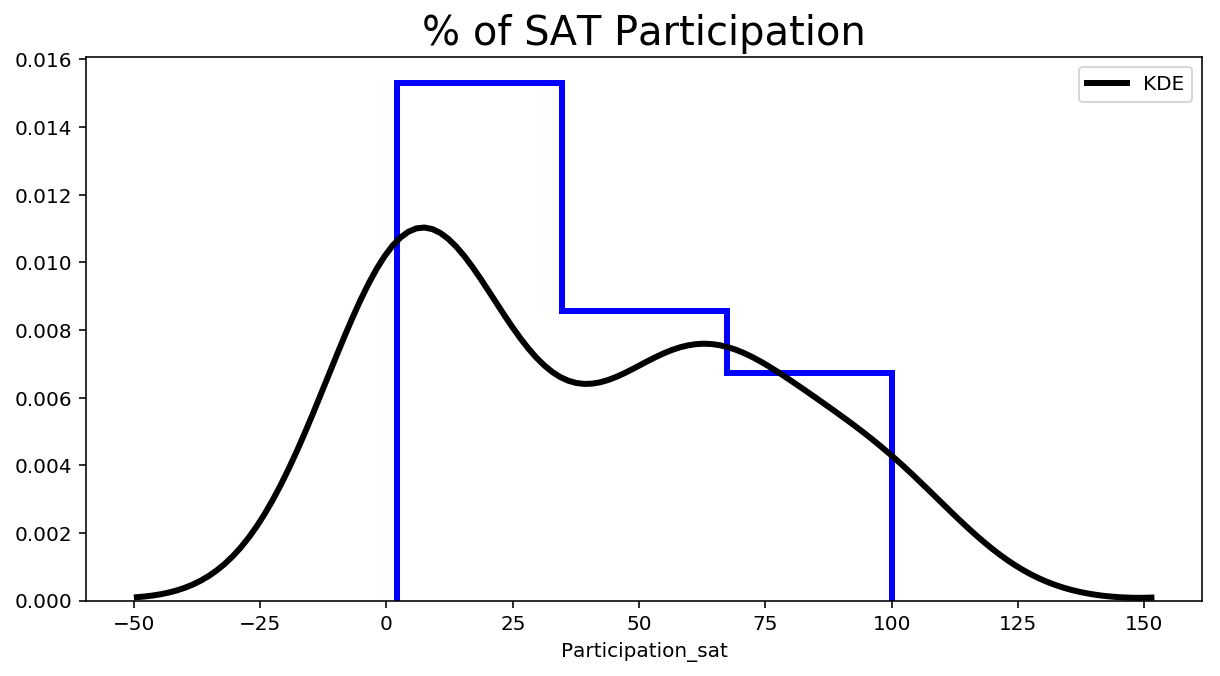

<Figure size 432x288 with 0 Axes>

In [18]:
sns_dist_plot(merged_dataframe["Participation_act"], "% of ACT Participation", "g")
sns_dist_plot(merged_dataframe["Participation_sat"], "% of SAT Participation", "b")

##### 17. Plot the Math(s) distributions from both data sets.

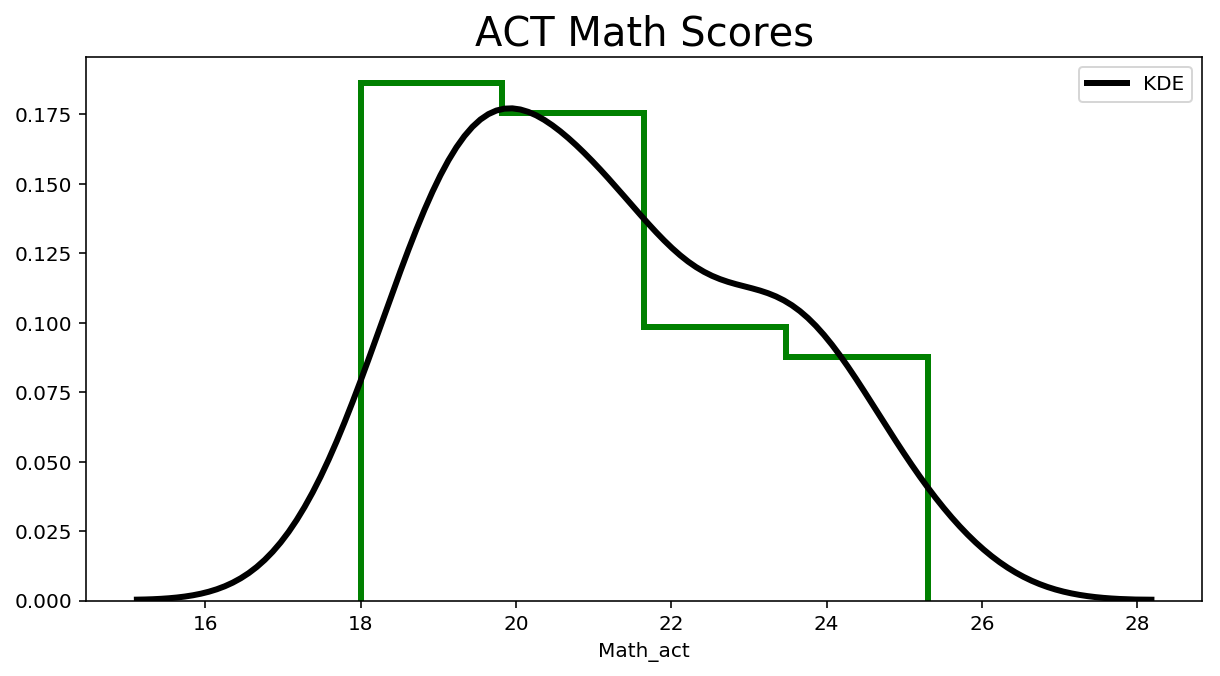

<Figure size 432x288 with 0 Axes>

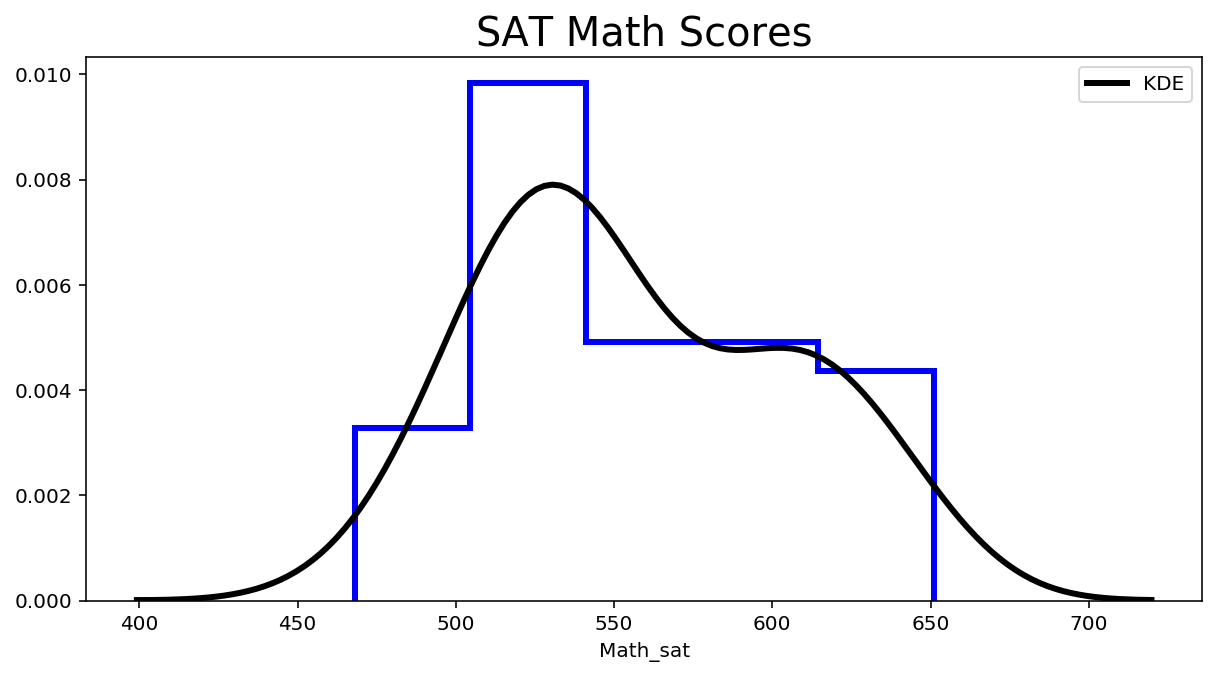

<Figure size 432x288 with 0 Axes>

In [19]:
sns_dist_plot(merged_dataframe["Math_act"], "ACT Math Scores", "g")
sns_dist_plot(merged_dataframe["Math_sat"], "SAT Math Scores", "b")

The distributions from both tests' math scores are quite similar.

##### 18. Plot the Verbal distributions from both data sets.

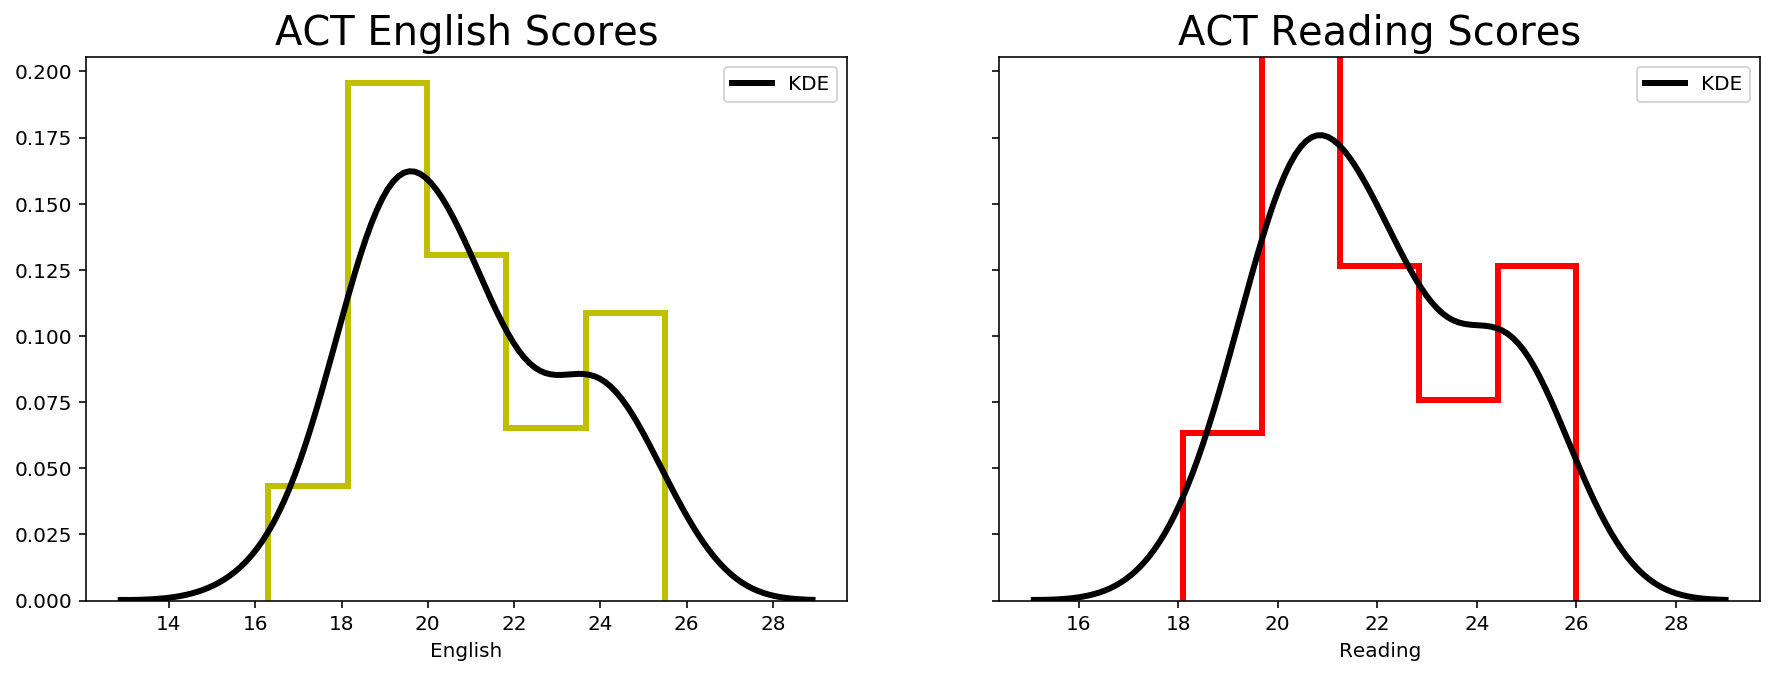

<Figure size 432x288 with 0 Axes>

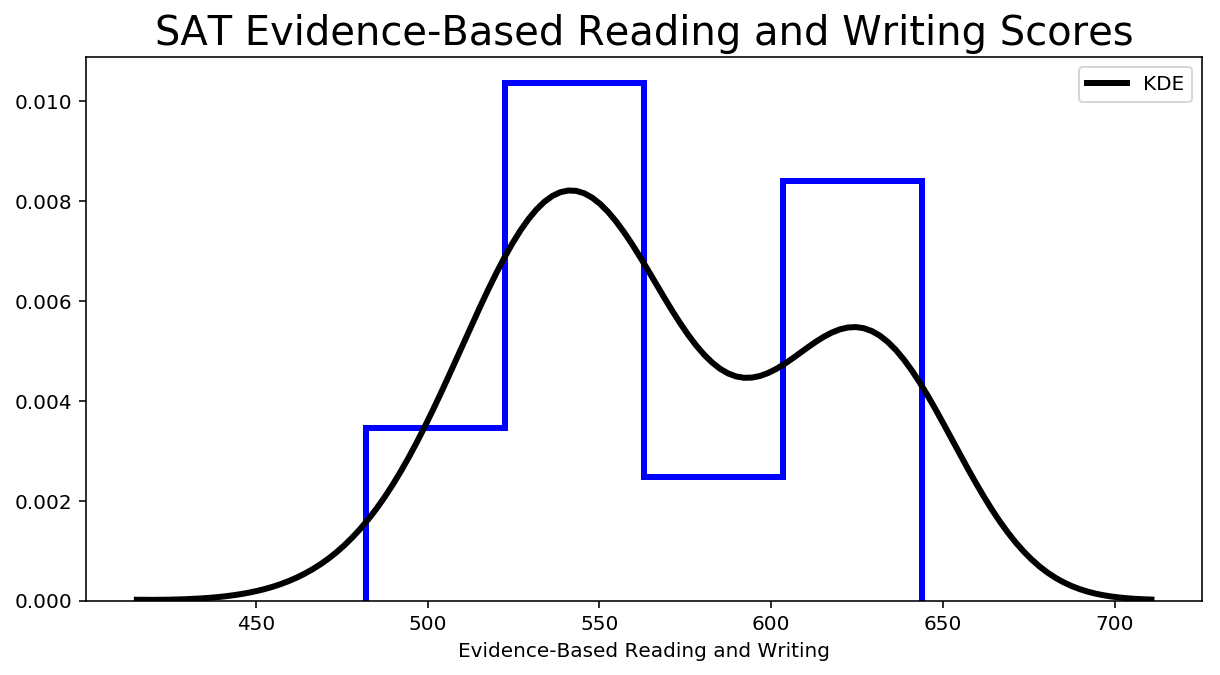

<Figure size 432x288 with 0 Axes>

In [20]:
#sns_plot(merged_dataframe["English"], "ACT English Scores", "g")

f, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,5), sharey=True)
ax1.set_title('ACT English Scores', fontsize=20)
sns.distplot(merged_dataframe["English"][:50],
             kde_kws={"color": "k", "lw": 3, "label": "KDE"},
             hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "y"}, ax=ax1)
ax2.set_title('ACT Reading Scores', fontsize=20)
sns.distplot(merged_dataframe["Reading"][:50],
             kde_kws={"color": "k", "lw": 3, "label": "KDE"},
             hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "r"}, ax=ax2)
plt.figure()
sns_dist_plot(merged_dataframe["Evidence-Based Reading and Writing"], "SAT Evidence-Based Reading and Writing Scores", "b")

The distributions of ACT's English and Reading scores are very similar.

##### 19. When we make assumptions about how data are distributed, what is the most common assumption?

Normal

##### 20. Does this assumption hold true for any of our columns? Which?

Using the following code snippet, we can look at each individual column to assess if it's a normal distribution or not.

`for x in rearranged_columns[1:]:
    sns_dist_plot(merged_dataframe[x], x, "b")`
   
After looking at all of the histograms, none of them are normal distributions.

##### 21. Plot some scatterplots examining relationships between all variables.

If we want to look at scatter plots comparing the relationship between all our variables, we could run the following bit of code:

`f,ax = plt.subplots(10,10, figsize=(20,20))
for x,c1 in enumerate(rearranged_columns[1:]):
    for y,c2 in enumerate(rearranged_columns[1:]):
        sns.regplot(merged_dataframe[c1],merged_dataframe[c2],ax=ax[x,y])`
        
However, that's extremely CPU intensive, and we can suffice with looking the few I've highlighted, graphed, and commented on below.

In [21]:
def sns_reg_plot(dataX, dataY, title):
    f, ax = plt.subplots(1, 1, figsize=(10,5))
    ax.set_title(title, fontsize=20)
    sns.regplot(dataX[:50], dataY[:50], ax=ax)
    plt.figure()

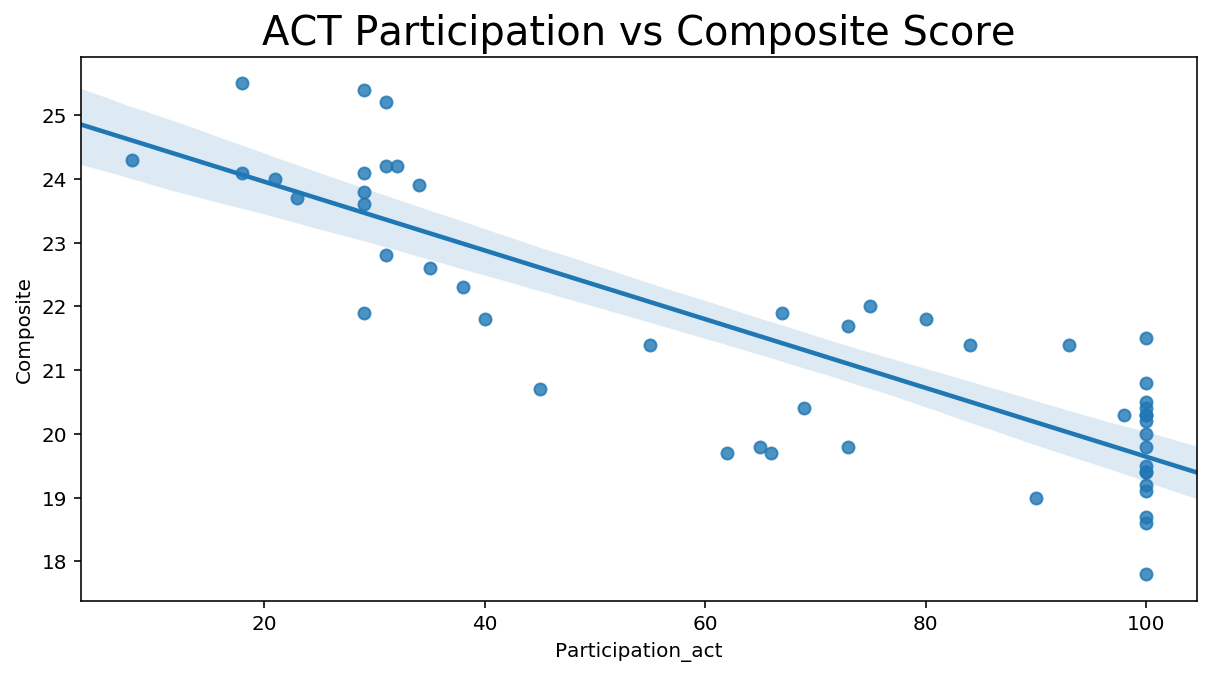

<Figure size 432x288 with 0 Axes>

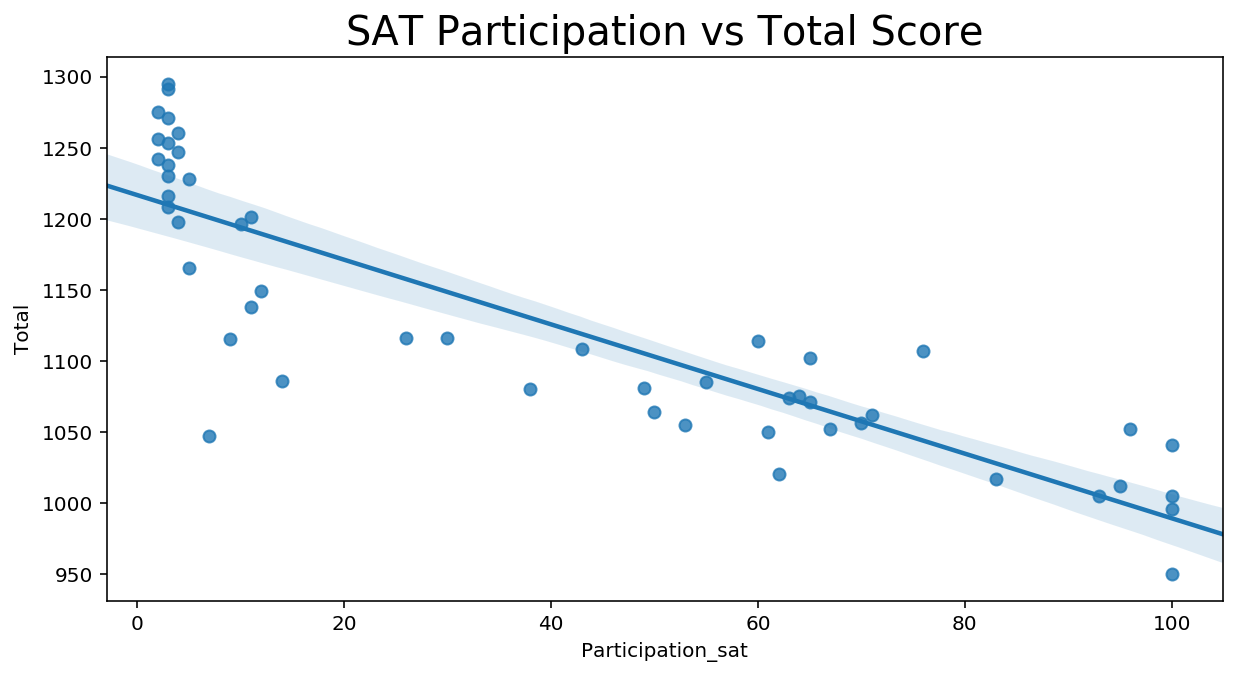

<Figure size 432x288 with 0 Axes>

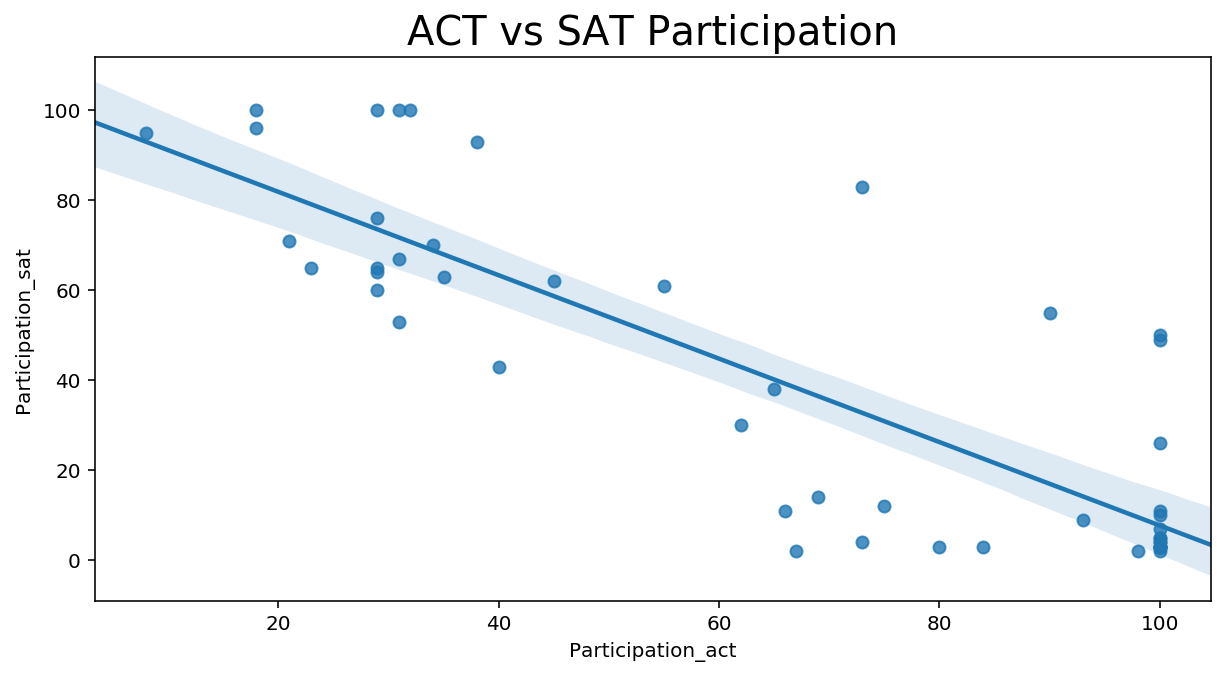

<Figure size 432x288 with 0 Axes>

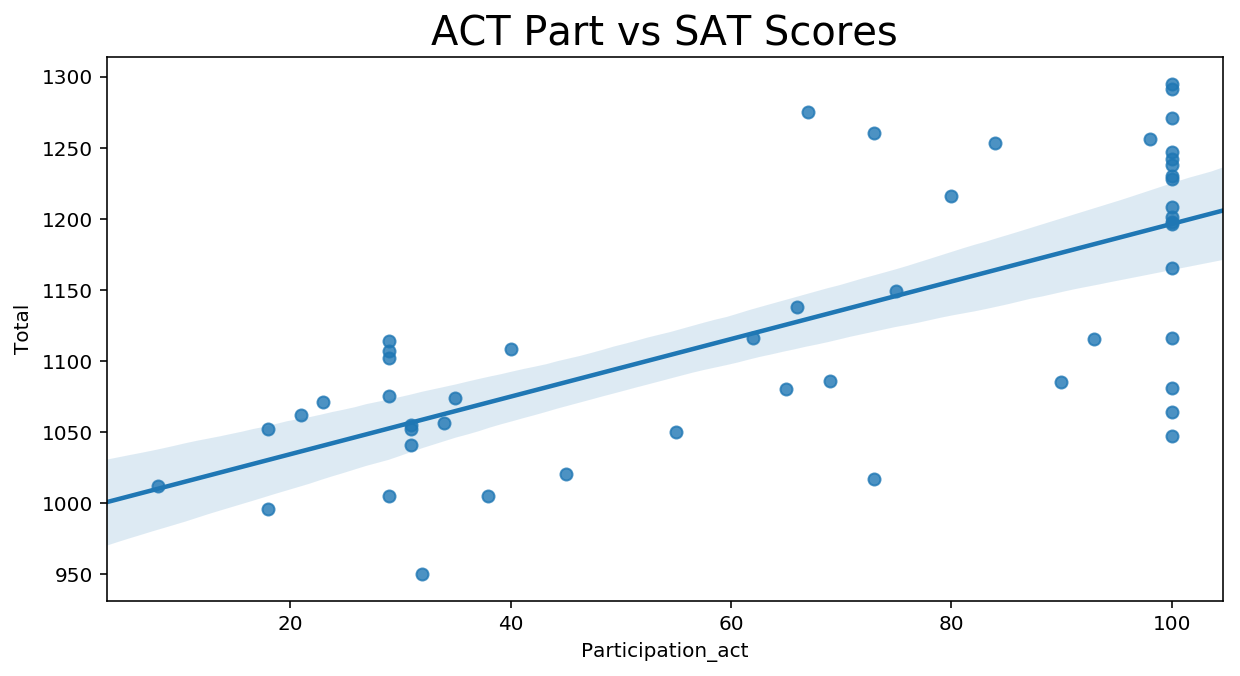

<Figure size 432x288 with 0 Axes>

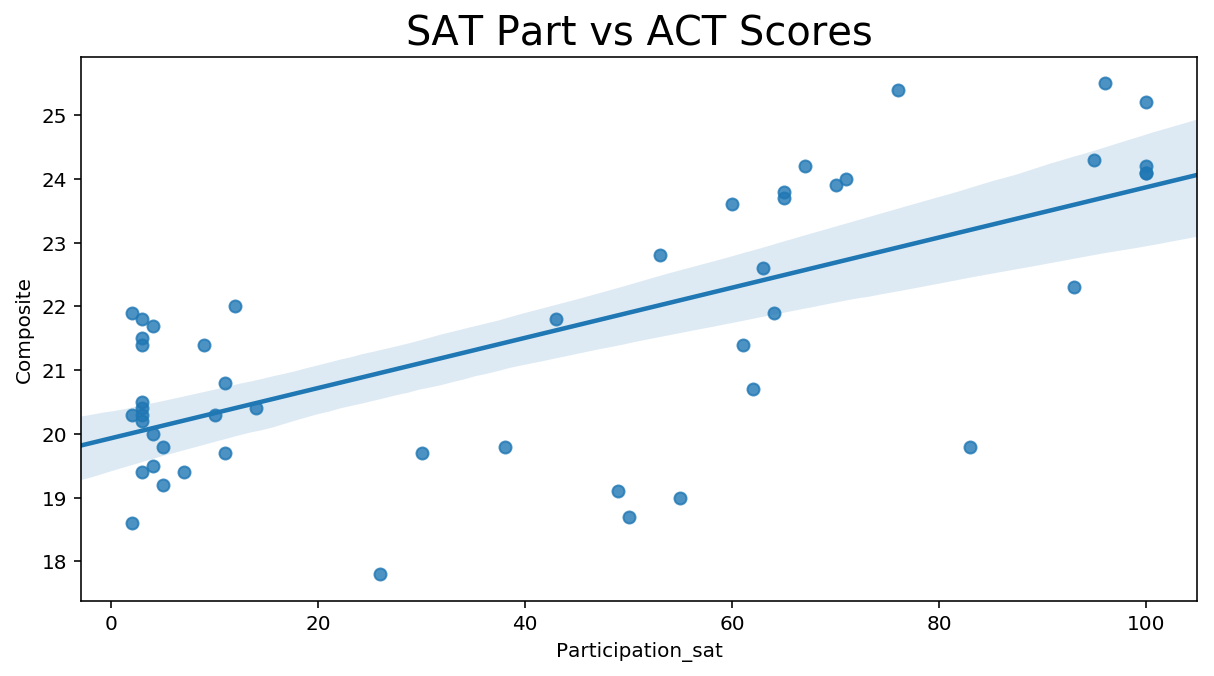

<Figure size 432x288 with 0 Axes>

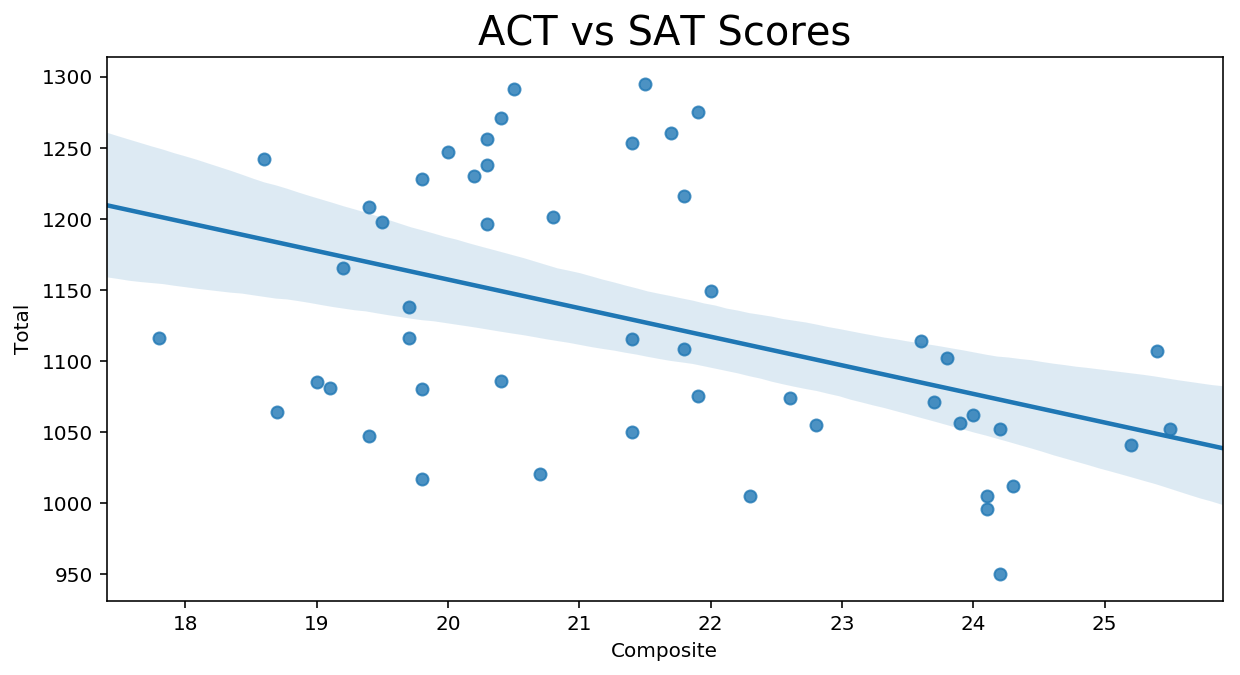

<Figure size 432x288 with 0 Axes>

In [22]:
sns_reg_plot(merged_dataframe["Participation_act"],merged_dataframe["Composite"],"ACT Participation vs Composite Score")
sns_reg_plot(merged_dataframe["Participation_sat"],merged_dataframe["Total"],"SAT Participation vs Total Score")
sns_reg_plot(merged_dataframe["Participation_act"],merged_dataframe["Participation_sat"],"ACT vs SAT Participation")
sns_reg_plot(merged_dataframe["Participation_act"],merged_dataframe["Total"],"ACT Part vs SAT Scores")
sns_reg_plot(merged_dataframe["Participation_sat"],merged_dataframe["Composite"],"SAT Part vs ACT Scores")
sns_reg_plot(merged_dataframe["Composite"],merged_dataframe["Total"],"ACT vs SAT Scores")
# sns_reg_plot(merged_dataframe["Total"],merged_dataframe["Composite"],"SAT vs ACT Scores")
# sns_reg_plot(merged_dataframe["Math_act"],merged_dataframe["Science"],"ACT: Math & Science")
# sns_reg_plot(merged_dataframe["English"],merged_dataframe["Reading"],"ACT: English & Reading")
# sns_reg_plot(merged_dataframe["Reading"]+merged_dataframe["English"],merged_dataframe["Math_act"]+merged_dataframe["Science"],"ACT: Math+Science & English+Reading")
# sns_reg_plot(merged_dataframe["Evidence-Based Reading and Writing"],merged_dataframe["Math_sat"],"ACT: Math & Science")

##### 22. Are there any interesting relationships to note?

The key things to note are the following:
- Test participation (ACT and SAT) is negatively correlated to total test score
- ACT participation is negatively correlated to SAT participation

Based on that, we'll later look into these six states based on their interesting participation rates:
1. Mississippi:
    - ACT: 100% - 2nd Lowest ACT Score
    - SAT: 2%   - 9th Highest SAT Score
2. Maine
    - ACT: 8%   - 4rth Highest ACT Score
    - SAT: 95%  - 5th Lowest SAT
3. Nevada
    - ACT: 100%  - Lowest ACT Score
    - SAT: 26%   - Average SAT Score
4. Delaware
    - ACT: 18%  - 8th Highest ACT Score
    - SAT: 100% - 2nd Lowest SAT Score
5. DC
    - ACT: 32%  - 5th Highest ACT Score
    - SAT: 100% - Lowest SAT Score
6. New Hampshire
    - ACT: 18%  - Highest ACT Score
    - SAT: 96%  - 12th Lowest SAT Score

##### 23. Create box plots for each variable. 

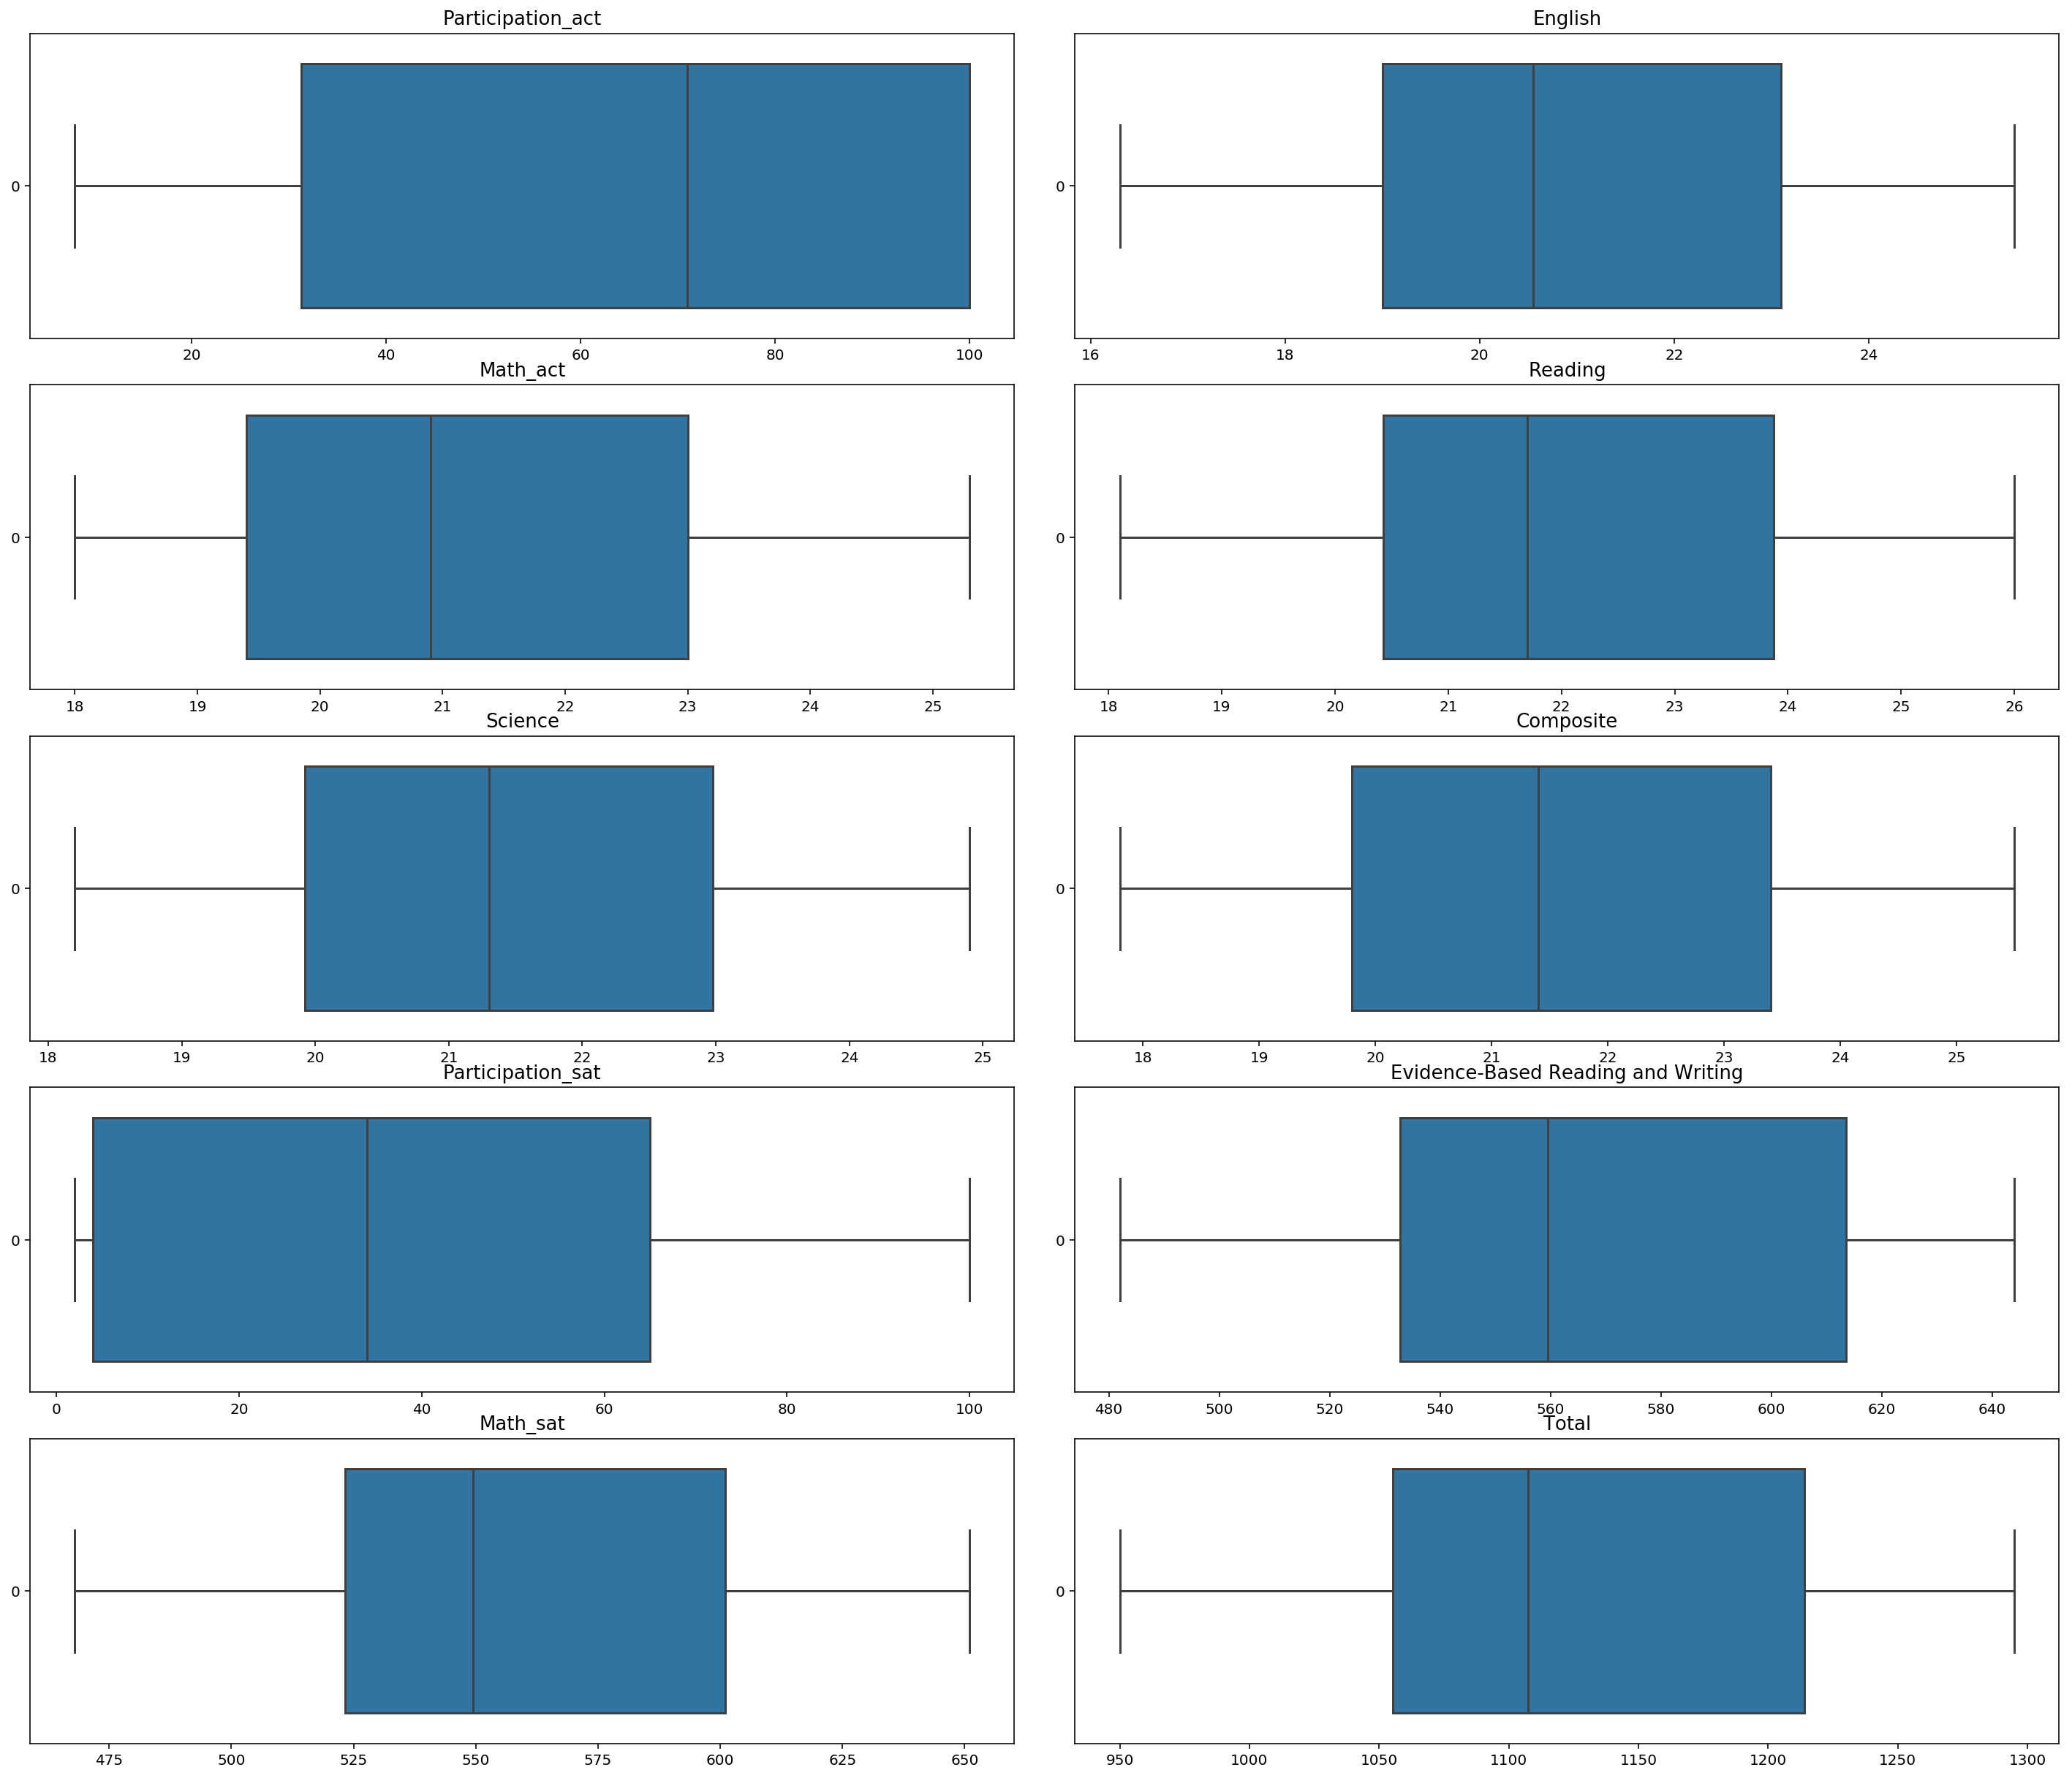

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [23]:
f, axes = plt.subplots(5,2,figsize=(20,17));

for ax, var in zip(axes.flatten(), rearranged_columns[1:]):
    ax.set_title(var, fontsize=13);
    sns.boxplot(data=merged_dataframe[var][:50], orient="h", ax=ax);
    plt.tight_layout();
    plt.figure();

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

https://us-west-2b.online.tableau.com/#/site/mayetm93atgmailcom/workbooks/51742/views

## Step 4: Descriptive and Inferential Statistics

##### 24. Summarize each distribution. As data scientists, be sure to back up these summaries with statistics. (Hint: What are the three things we care about when describing distributions?)

Participation_act's mean is: 66.0, and it's std is: 32.019126936815724
English's mean is: 20.883999999999997, and it's std is: 2.3528844651028757
Math_act's mean is: 21.143999999999995, and it's std is: 1.9829024284659917
Reading's mean is: 21.97, and it's std is: 2.064298072133054
Science's mean is: 21.416000000000004, and it's std is: 1.7387962056831037
Composite's mean is: 21.477999999999998, and it's std is: 2.019020777000372
Participation_sat's mean is: 39.22, and it's std is: 35.38493280179792
Evidence-Based Reading and Writing's mean is: 569.78, and it's std is: 45.8824095945721
Math_sat's mean is: 557.54, and it's std is: 47.3627813924023
Total's mean is: 1127.42, and it's std is: 92.94591141615425


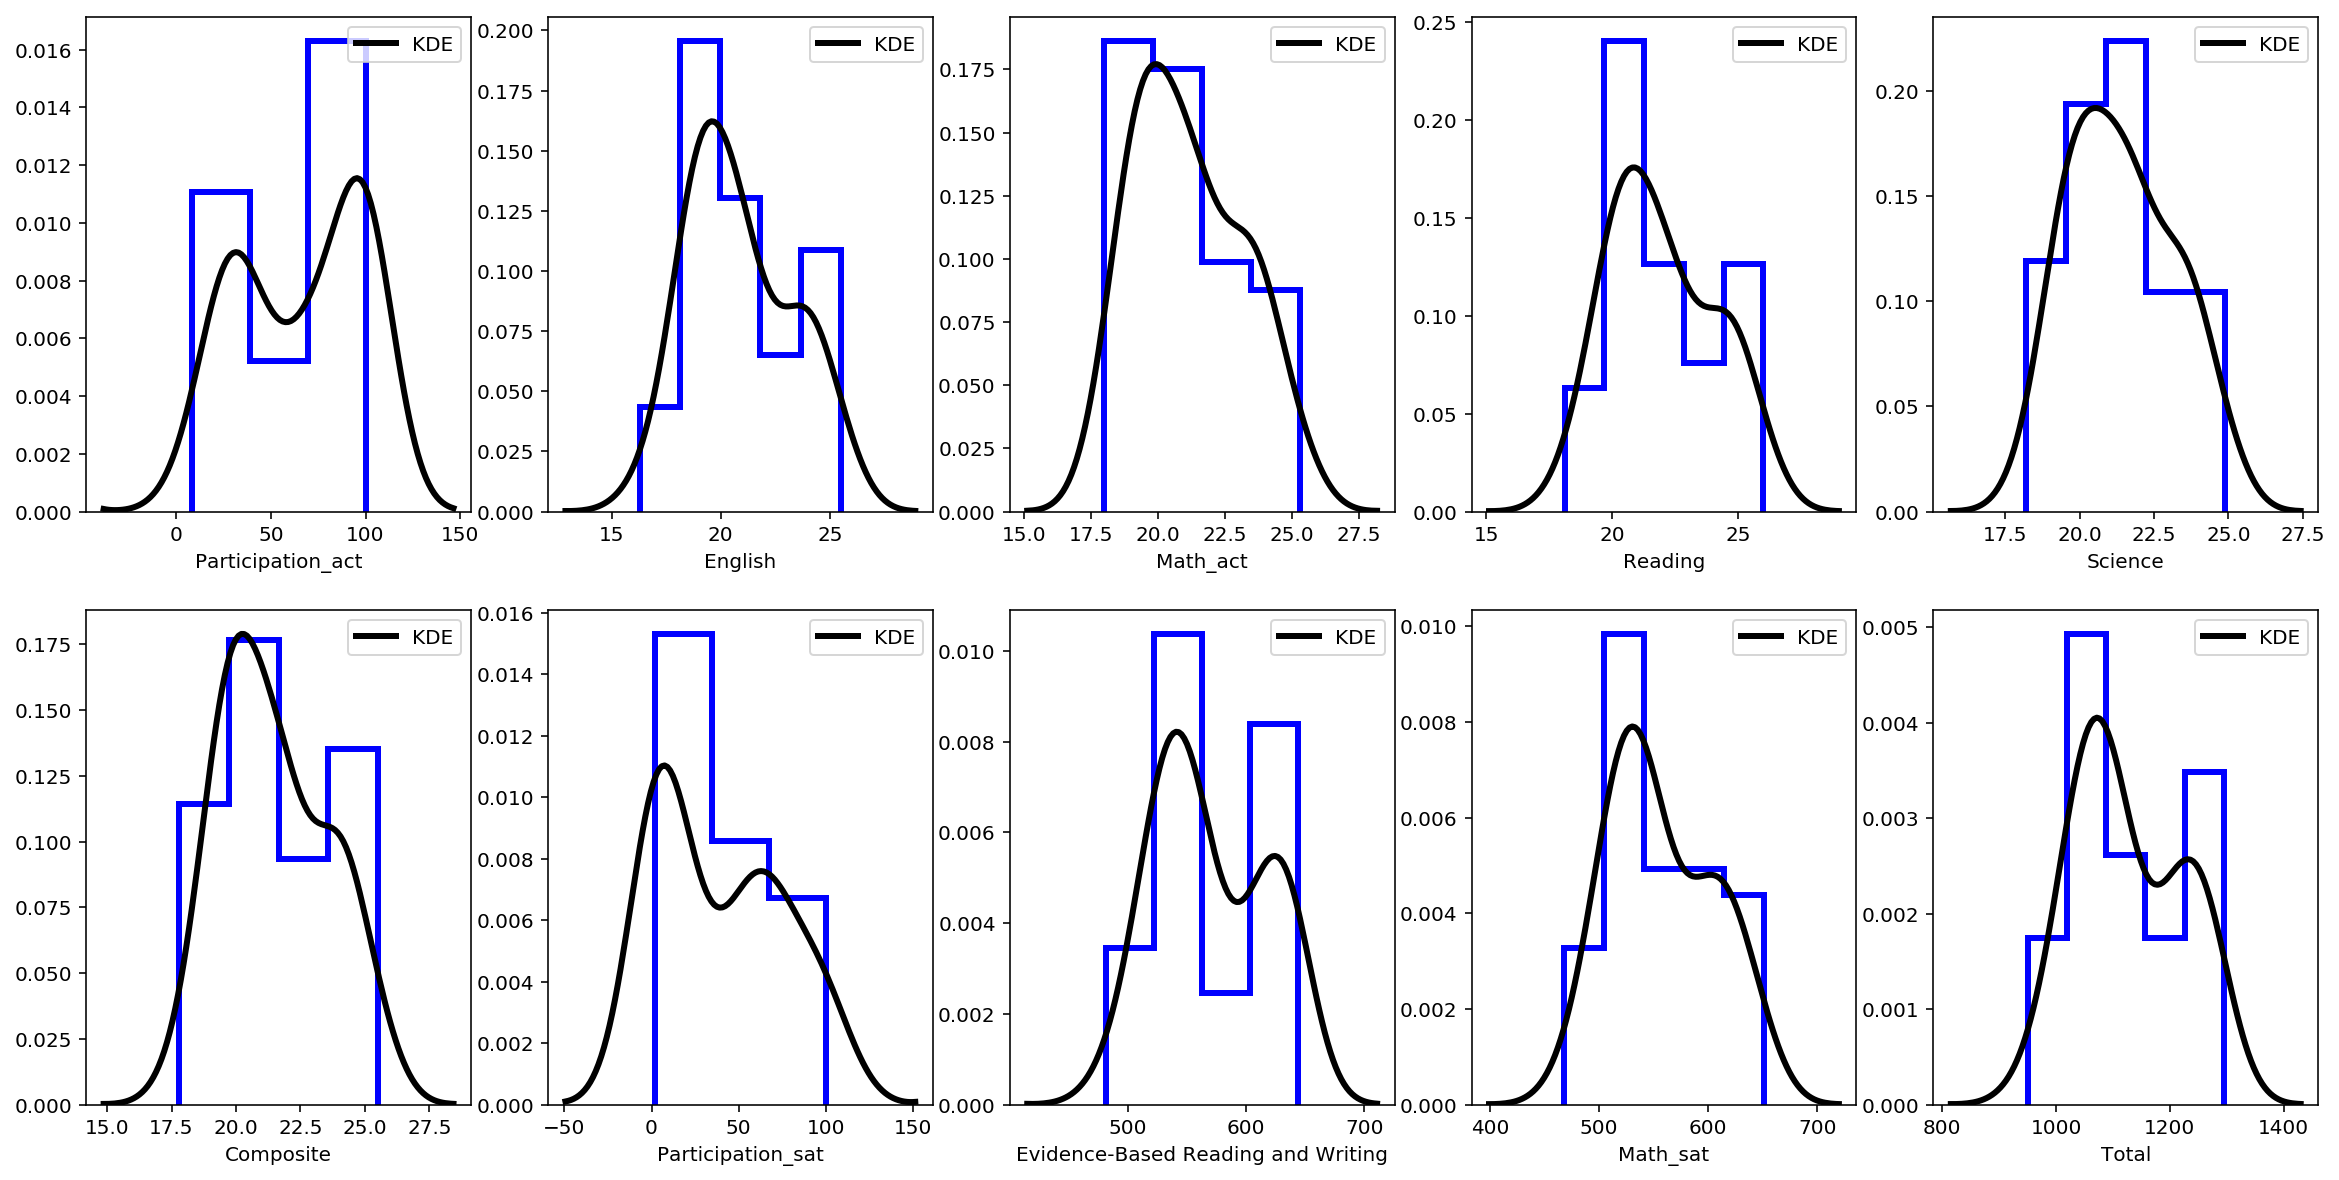

In [24]:
f, axes = plt.subplots(2,5,figsize=(20,10))

for ax, var in zip(axes.flatten(), rearranged_columns[1:]):
    sns.distplot(merged_dataframe[var][:50],
             kde_kws={"color": "k", "lw": 3, "label": "KDE"},
             hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "b"}, ax=ax)
    print('{}\'s mean is: {}, and it\'s std is: {}'.format(var,merged_dataframe[var][50],merged_dataframe[var][51]))
#"Mean = " + str(np.mean(merged_dataframe[var][:50])) + "\n Std = " + str(np.std(merged_dataframe[var][:50]))

None of them are normally distributed. They're very bi-modal.

Participation_act's mean is: 66.0, and it's std is: 32.019126936815724
English's mean is: 20.883999999999997, and it's std is: 2.3528844651028757
Math_act's mean is: 21.143999999999995, and it's std is: 1.9829024284659917
Reading's mean is: 21.97, and it's std is: 2.064298072133054
Science's mean is: 21.416000000000004, and it's std is: 1.7387962056831037
Composite's mean is: 21.477999999999998, and it's std is: 2.019020777000372
Participation_sat's mean is: 39.22, and it's std is: 35.38493280179792
Evidence-Based Reading and Writing's mean is: 569.78, and it's std is: 45.8824095945721
Math_sat's mean is: 557.54, and it's std is: 47.3627813924023
Total's mean is: 1127.42, and it's std is: 92.94591141615425


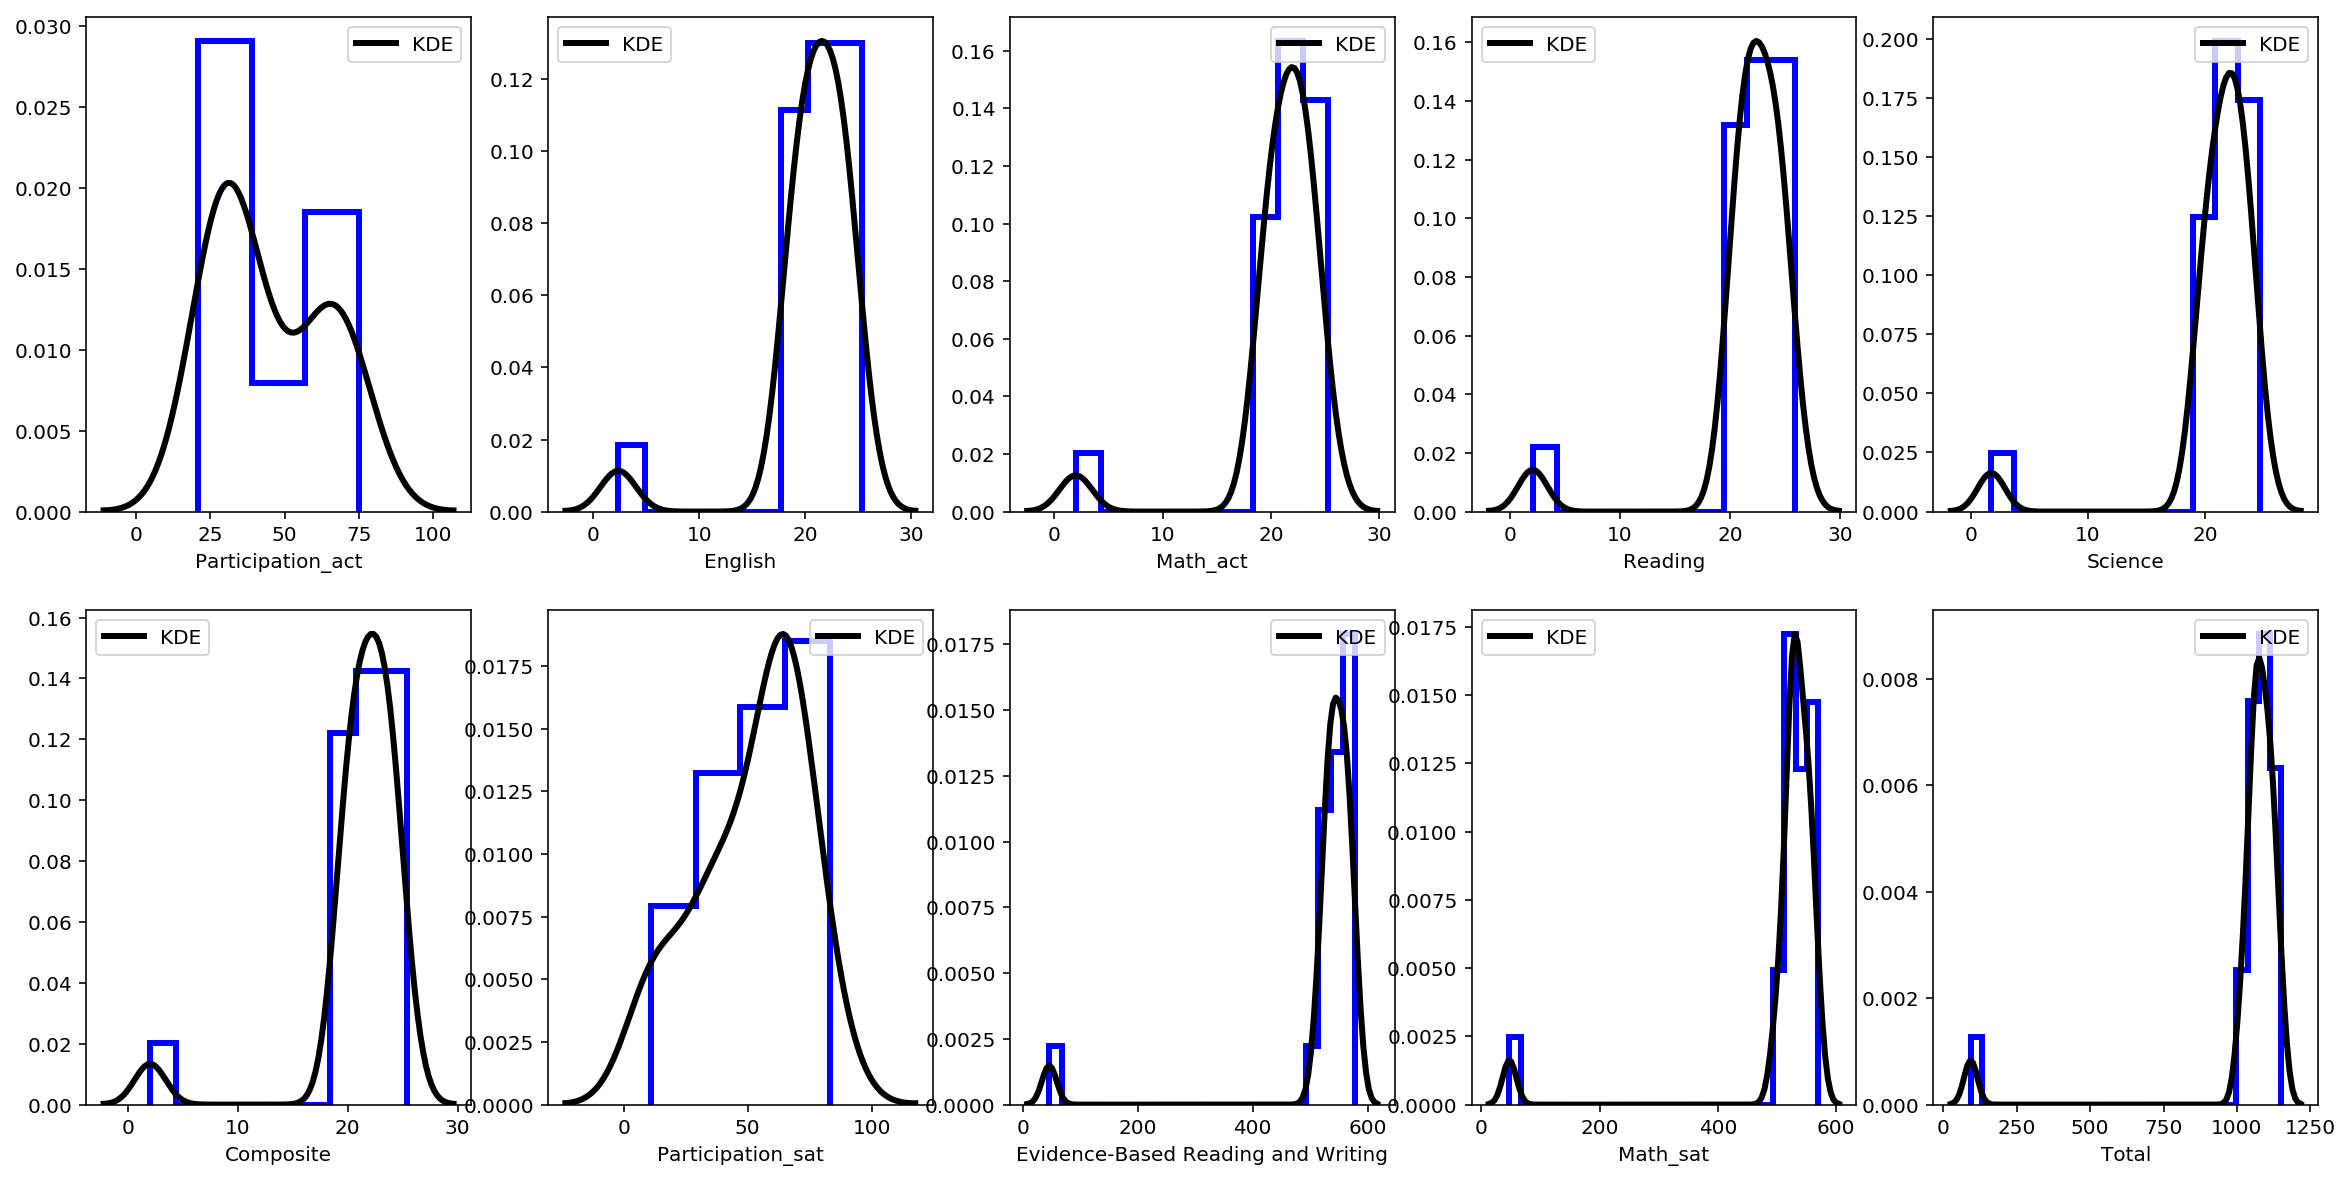

In [25]:
f, axes = plt.subplots(2,5,figsize=(20,10))

for ax, var in zip(axes.flatten(), rearranged_columns[1:]):
    sns.distplot(merged_dataframe.query("Participation_act < 90 and Participation_act > 10 and Participation_sat < 90 and Participation_sat > 10")[var][:50],
             kde_kws={"color": "k", "lw": 3, "label": "KDE"},
             hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "b"}, ax=ax)
    print('{}\'s mean is: {}, and it\'s std is: {}'.format(var,merged_dataframe[var][50],merged_dataframe[var][51]))

Even if take out states that have very high or very low participation rates, none of them are normally distributed. However, most tend to have a somewhat normal peak, with a few outliers.

##### 25. Summarize each relationship. Be sure to back up these summaries with statistics.

First, when we look at any scores, seeing subject scores for each test are positively correlated. See `sns_reg_plot(merged_dataframe["Reading"]+merged_dataframe["English"],merged_dataframe["Math_act"]+merged_dataframe["Science"],"ACT: Math+Science & English+Reading")` and similar such comparisons. There's nothing surprising there.

Looking back at question 21, we clearly see that participation and scores (of the same test) are negatively correlated. At the same time, participation between ACT and SAT are also negatively correlated. We also see that ACT and SAT scores are negatively correlated.

In [26]:
merged_dataframe["Participation_sat"][50] - merged_dataframe["Participation_act"][50]

-26.78

##### 26. Execute a hypothesis test comparing the SAT and ACT participation rates. Use $\alpha = 0.05$. Be sure to interpret your results.

We have two hypotheses:

$H_0$ The difference in SAT and ACT participation rates is 0.

$H_1$ The difference in SAT and ACT participation rates is not 0.

Our measured difference is `-26.78` (after having adjusted SAT scores by dividing by 50 to keep a similar scale).

Now, `-26.78` does seem quite small, so it probably doesn't support $H_0$. But let's verify that with an $\alpha = 0.05$.

Let's go ahead an calculate our t and p values and compare that to our $\alpha$.

In [27]:
import scipy as sp

In [28]:
sat = np.array(merged_dataframe["Participation_sat"][:50])
act = np.array(merged_dataframe["Participation_act"][:50])

In [29]:
tvalue, pvalue = sp.stats.ttest_ind(sat, act)
pvalue

0.00013804998899950548

We find a `pvalue` of $.0001$ which is much smaller than our $\alpha$ which means we **do** have enough evidence to reject our $H_0$.

##### 27. Generate and interpret 95% confidence intervals for SAT and ACT participation rates.

In [30]:
np.random.seed(4)

In [31]:
def get_sample_means(distribution, sample_size = 200, num_samples = 200, replace = False): # randomly sample
    sample_means = []
    for _ in range(num_samples):
        this_mean = np.random.choice(distribution, size=sample_size, replace=replace).mean()
        sample_means.append(this_mean)
    
    return sample_means

def confidence_interval_mean(distribution, confidence=.95):
    #means = np.mean(distribution)
    means = get_sample_means(distribution, replace=True)
    
    dist_from_0_or_100 = (100-confidence)/2
    lower_percentile, upper_percentile = 0+dist_from_0_or_100, 100-dist_from_0_or_100

    return (np.percentile(means, lower_percentile), np.percentile(means, upper_percentile))

In [32]:
cim_act = confidence_interval_mean(merged_dataframe["Participation_act"][:50])
cim_sat = confidence_interval_mean(merged_dataframe["Participation_sat"][:50])
cim_act, cim_sat

((65.74554749999999, 65.81222625000001),
 (38.926095000000004, 38.96558375000001))

##### 28. Given your answer to 26, was your answer to 27 surprising? Why?

No, it wasn't surprising. The reason being that, which such a small pvalue, it's quite normal to expect a very tight restrictive range for our confidence intervals. Our CI are very constrained, varying by less than a 10th of a decimal. Because of that, it's not surprising at all.

##### 29. Is it appropriate to generate correlation between SAT and ACT math scores? Why?

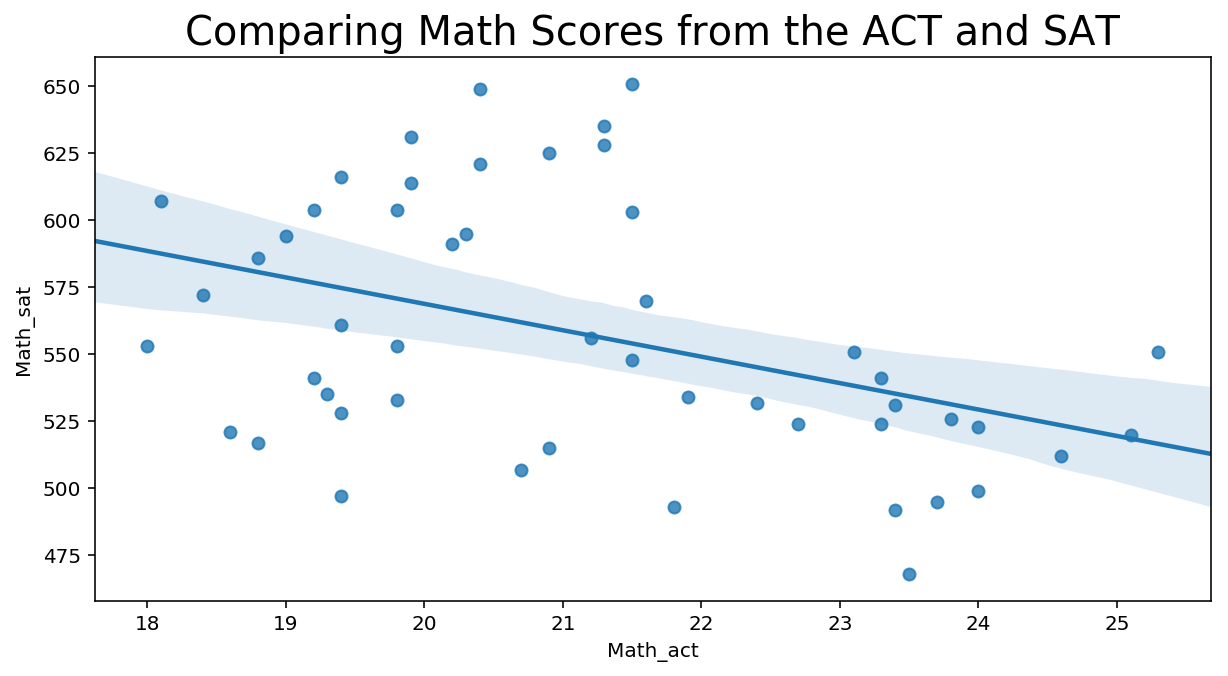

<Figure size 432x288 with 0 Axes>

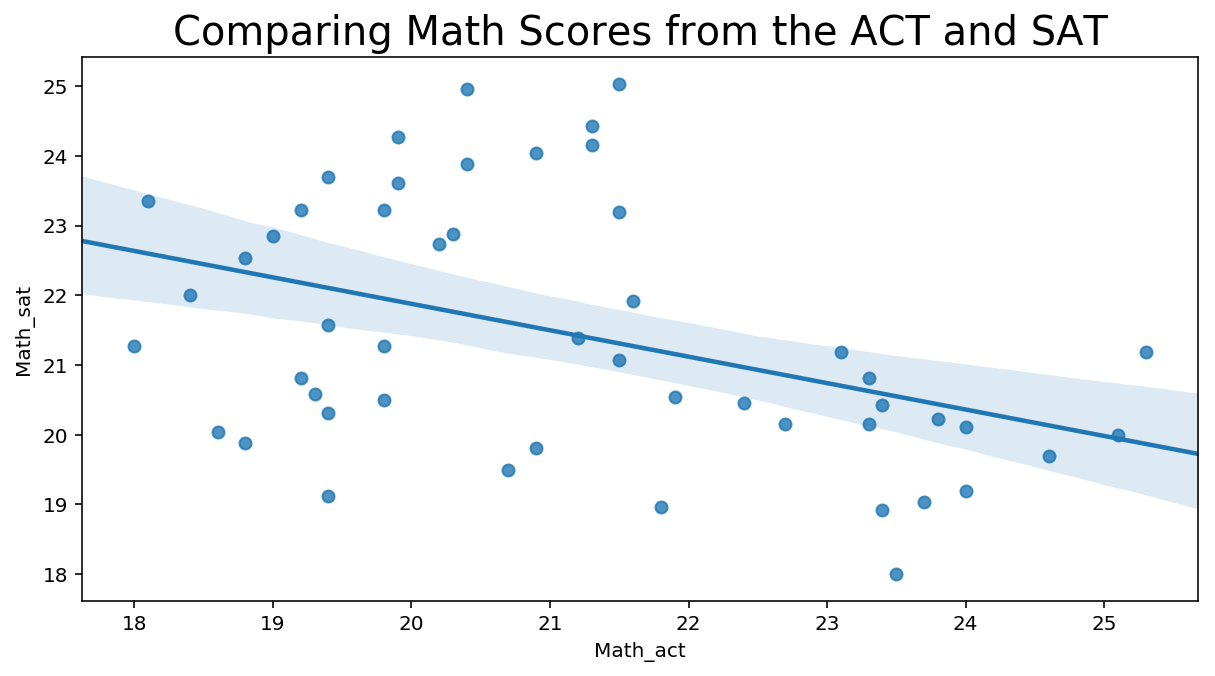

<Figure size 432x288 with 0 Axes>

In [33]:
sns_reg_plot(merged_dataframe["Math_act"],merged_dataframe["Math_sat"], "Comparing Math Scores from the ACT and SAT")
sns_reg_plot(merged_dataframe["Math_act"],merged_dataframe["Math_sat"]/26, "Comparing Math Scores from the ACT and SAT")

Text(0.5,0,'')

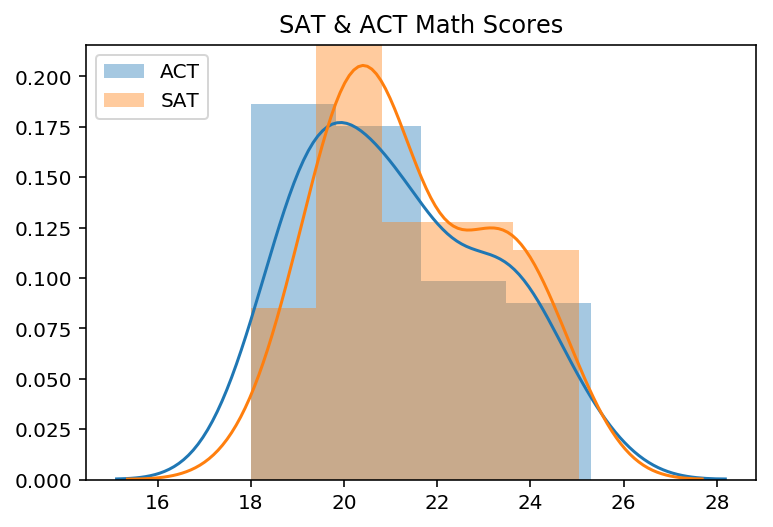

In [34]:
sns.distplot(merged_dataframe["Math_act"][:50],label="ACT")
sns.distplot(merged_dataframe["Math_sat"][:50]/26,label="SAT")
plt.title("SAT & ACT Math Scores")
plt.legend(loc='upper left')
plt.xlabel("")

In [35]:
np.corrcoef(merged_dataframe["Math_act"][:50],merged_dataframe["Math_sat"][:50]/26)[0,1]

-0.41267719157974153

Both of these scatter plots (the later adjusts SAT scores by 26) show that there's a negative correlation between the math scores on the SAT and ACT. We can also compare their distributions.

However, looking and comparing these two values doesn't make much sense. Yes, they have a correlation of `-0.41` but that doesn't give us much insight.

The more appropriate correlation to look at and analyze (as done above) is with the overall scores.

##### 30. Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

There are two things we need to consider:

1. Are these numbers inconsistent in comparison to previous years?
2. Are there going to be changes to policy in future years without having considered the 2017 data?

In both cases, if the answer is yes, then we absolutely do not want to use this data to infer. Because we are unsure about data from previous years and the trends and relationships contained therein. And also because, if there is already policy enacted for future years that undermine this data, there's no purpose to infer.

However, if this data is consistent, and it can be used to affect future policy before it's written, then we can use this data (although would be much better to look at this data along side previous years). Since the trends of 2017 would be similar to previous years, SAT and ACT policy makers could implement changes based on this data set. For example, changing mandatory participation, waiving fees, or setting a passing threshold.

But since we know that the SAT was again redesigned to fit with Common Core standards, it seems best to hold off until enough data is collected on the new assessments' results.